In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pyodbc
import sqlite3 as sql
from IPython.display import Markdown, display
% matplotlib inline

def printmd(string):
    display(Markdown(string))

In [2]:
con = sql.connect('Equity.db')
c = con.cursor()

In [3]:
df = pd.read_csv("Revenue_Aid_2016.csv")

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')','')

In [5]:
df

,school_id,survey_year,institution_name,state_cd,classification_name,sanction_name,total_mens_team_revenue,total_womens_team_revenue,not_allocated_by_gender/sport_revenue,grand_total_revenue,mens_team_athletic_student_aid,womens_team_athletic_student_aid,male_undergraduates,female_undergraduates,total_undergraduates
0,1,2016,University of Louisville,KY,NCAA Division I-FBS,NCAA,87066830,1723173,33655301,122445304,6249734,5907156,5925,6400,12325
1,2,2016,University of Kentucky,KY,NCAA Division I-FBS,NCAA,65217902,1626718,55447093,122307014,7119237,4874527,9420,11352,20772
2,3,2016,Indiana University,IN,NCAA Division I-FBS,NCAA,62767976,756377,41294985,104819338,8487821,7039065,16085,15799,31884


In [6]:
df.to_sql("equity", con, schema=None,
         if_exists='replace', index=True, index_label=None,
         chunksize=None, dtype=None)

In [7]:
drop_table_sql = "DROP TABLE IF EXISTS equity;"

In [8]:
df1 = pd.read_sql("SELECT * FROM Equity", con)
df1

,index,school_id,survey_year,institution_name,state_cd,classification_name,sanction_name,total_mens_team_revenue,total_womens_team_revenue,not_allocated_by_gender/sport_revenue,grand_total_revenue,mens_team_athletic_student_aid,womens_team_athletic_student_aid,male_undergraduates,female_undergraduates,total_undergraduates
0,0,1,2016,University of Louisville,KY,NCAA Division I-FBS,NCAA,87066830,1723173,33655301,122445304,6249734,5907156,5925,6400,12325
1,1,2,2016,University of Kentucky,KY,NCAA Division I-FBS,NCAA,65217902,1626718,55447093,122307014,7119237,4874527,9420,11352,20772
2,2,3,2016,Indiana University,IN,NCAA Division I-FBS,NCAA,62767976,756377,41294985,104819338,8487821,7039065,16085,15799,31884


In [9]:
revenue = pd.read_sql("SELECT institution_name, grand_total_revenue FROM Equity", con)
revenue

,institution_name,grand_total_revenue
0,University of Louisville,122445304
1,University of Kentucky,122307014
2,Indiana University,104819338


In [10]:
aid = pd.read_sql("SELECT institution_name, mens_team_athletic_student_aid, womens_team_athletic_student_aid FROM Equity", con)
aid

,institution_name,mens_team_athletic_student_aid,womens_team_athletic_student_aid
0,University of Louisville,6249734,5907156
1,University of Kentucky,7119237,4874527
2,Indiana University,8487821,7039065


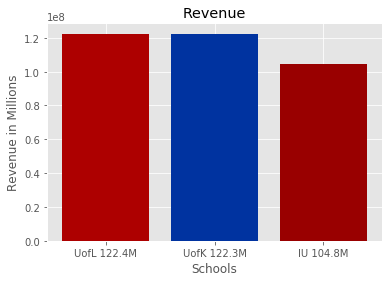

In [46]:
x = ["UofL 122.4M", "UofK 122.3M", "IU 104.8M"]
amnt = revenue['grand_total_revenue']
my_colors = [('#AD0000'), ('#0033a0'), ('#990000')]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, amnt, color=my_colors)
plt.xlabel("Schools")
plt.ylabel("Revenue in Millions")
plt.title("Revenue")

plt.plot(kind='bar', stacked=True, color=my_colors)
plt.xticks(x_pos, x)

plt.show()

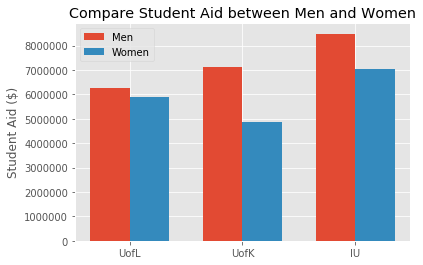

In [39]:
N = 3
mens_aid = aid['mens_team_athletic_student_aid']
womens_aid = aid['womens_team_athletic_student_aid']

ind = np.arange(N)
width = 0.35
plt.bar(ind, mens_aid, width, label='Men')
plt.bar(ind + width, womens_aid, width, label='Women')

plt.ylabel('Student Aid ($)')
plt.title('Compare Student Aid between Men and Women')

plt.xticks(ind + width / 2, ('UofL', 'UofK', 'IU'))
plt.legend(loc='best')
plt.show()

In [ ]:
labels = ['UofL(122.4M)', 'UofK(122.3M)', 'IU(104.8M)']
sizes = revenue['grand_total_revenue']

colors = ['#AD0000', '#0033a0', '#990000']

fig1, ax1 = plt.subplots()

patches, texts = ax1.pie(sizes, colors = colors,
                                    labels = labels, startangle=10)


for text in texts:
    text.set_color('black')
    
ax1.axis('equal')
plt.tight_layout()
plt.show()

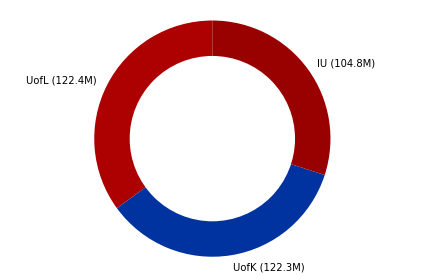

In [17]:
labels = ['UofL (122.4M)', 'UofK (122.3M)', 'IU (104.8M)']
sizes = revenue['grand_total_revenue']

colors = ['#AD0000', '#0033a0', '#990000']

fig1, ax1 = plt.subplots()

ax1.pie(sizes, colors=colors, labels=labels, startangle=90)

center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

ax1.axis('equal')
plt.tight_layout()
plt.show()

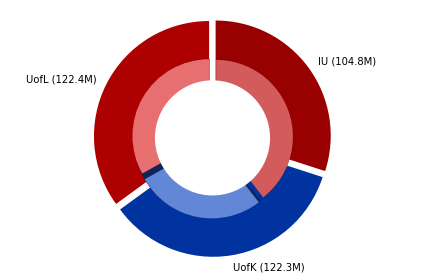

In [30]:
labels = ['UofL (122.4M)', 'UofK (122.3M)', 'IU (104.8M)']
sizes = revenue['grand_total_revenue']
colors = ['#AD0000', '#0033a0', '#990000']

labels_men = ['men', 'women', 'men', 'women', 'men', 'women']
sizes_men = aid['mens_team_athletic_student_aid']
colors_men = ['#6B0606', '#0D2559', '#6E1010']

labels_women = ['male', 'female', 'male', 'female', 'male', 'female']
sizes_women = aid['womens_team_athletic_student_aid']
colors_women = ['#E86F6F', '#6287D6', '#D45B5B']

explode = (0.1, 0.1, 0.1)
explode_men = (0.1, 0.1, 0.1)
explode_women = (0.1, 0.1, 0.1)

plt.pie(sizes, labels=labels, colors=colors,
        startangle=90, frame=True, explode=explode,
        radius=3)

plt.pie(sizes_male, colors=colors_male,
        startangle=90, explode=explode_male,
        radius=2)

center_circle = plt.Circle((0,0), 1.5, color='black',
                           fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

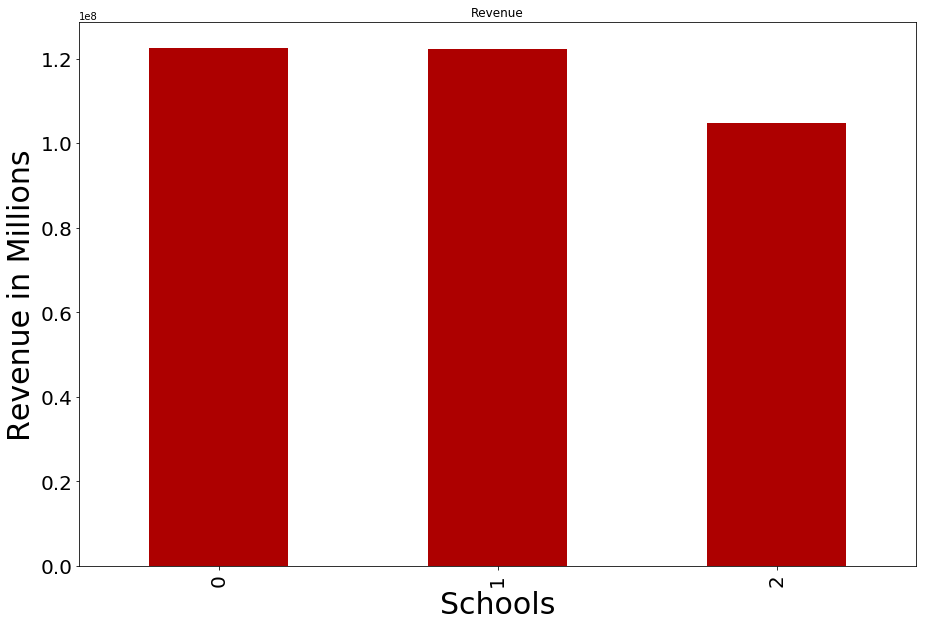

In [65]:
title = ("Revenue")
ax = revenue[['institution_name', 'grand_total_revenue']].plot(kind='bar',
                                                              title=title,
                                                              color =("#AD0000",
                                                                      "#0033a0",
                                                                      "#990000"),
                                                           figsize=(15, 10),
                                                                 legend=False,
                                                              fontsize=20)
ax.set_xlabel("Schools", fontsize=30)
ax.set_ylabel("Revenue in Millions", fontsize=30)
plt.show()

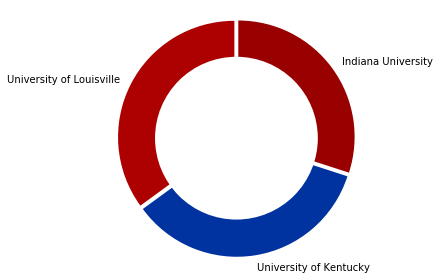

In [69]:
labels = revenue['institution_name']
sizes = revenue['grand_total_revenue']

colors = ['#AD0000', '#0033a0', '#990000']

explode = (0.02, 0.02, 0.02)

fig, ax = plt.subplots()

plt.pie(sizes, colors = colors, labels=labels, startangle=90,
        explode = explode)

center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

ax.axis('equal')
plt.tight_layout()
plt.show()

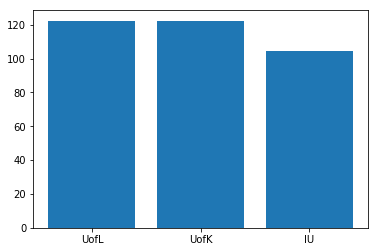

In [13]:
height = [122.445, 122.307, 104.819]

bars = ('UofL', 'UofK', 'IU')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)

plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')

plt.show()